In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

In [93]:
df_mkd = pd.read_csv('corona_macedonia.csv')

In [94]:
df_china = pd.read_csv('corona_china.csv')

In [95]:
data = np.array(df_china['active'])

In [96]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(data.reshape(-1,1))

In [97]:
scaled_full_data.shape

(65, 1)

In [132]:
length = 14
batch_size = 1
n_features = 1

In [133]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data, length=length, batch_size=1)

In [134]:
model = Sequential()
model.add(LSTM(100 , activation='relu', input_shape=[length,n_features]))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [135]:
model.fit_generator(generator, epochs=20)

Epoch 1/20
51/51 [==============================] - 2s 37ms/step - loss: 0.1066
Epoch 2/20
51/51 [==============================] - 2s 39ms/step - loss: 0.0407
Epoch 3/20
51/51 [==============================] - 2s 34ms/step - loss: 0.0279
Epoch 4/20
51/51 [==============================] - 2s 34ms/step - loss: 0.0104
Epoch 5/20
51/51 [==============================] - 2s 40ms/step - loss: 0.0085
Epoch 6/20
51/51 [==============================] - 2s 39ms/step - loss: 0.0071
Epoch 7/20
51/51 [==============================] - 2s 39ms/step - loss: 0.0077
Epoch 8/20
51/51 [==============================] - 2s 43ms/step - loss: 0.0068
Epoch 9/20
51/51 [==============================] - 2s 44ms/step - loss: 0.0057
Epoch 10/20
51/51 [==============================] - 2s 39ms/step - loss: 0.0033
Epoch 11/20
51/51 [==============================] - 2s 40ms/step - loss: 0.0045
Epoch 12/20
51/51 [==============================] - 2s 42ms/step - loss: 0.0033
Epoch 13/20
51/51 [==================

In [136]:
test_predictions = []
periods = 65
#first_eval_batch = scaled_train[-length:]
first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(periods):
    current_predict = model.predict(current_batch)[0]
    test_predictions.append(current_predict)
    current_batch = np.append(current_batch[:,1:,:],[[current_predict]] ,axis = 1)

In [137]:
forecast_predictions = full_scaler.inverse_transform(test_predictions)

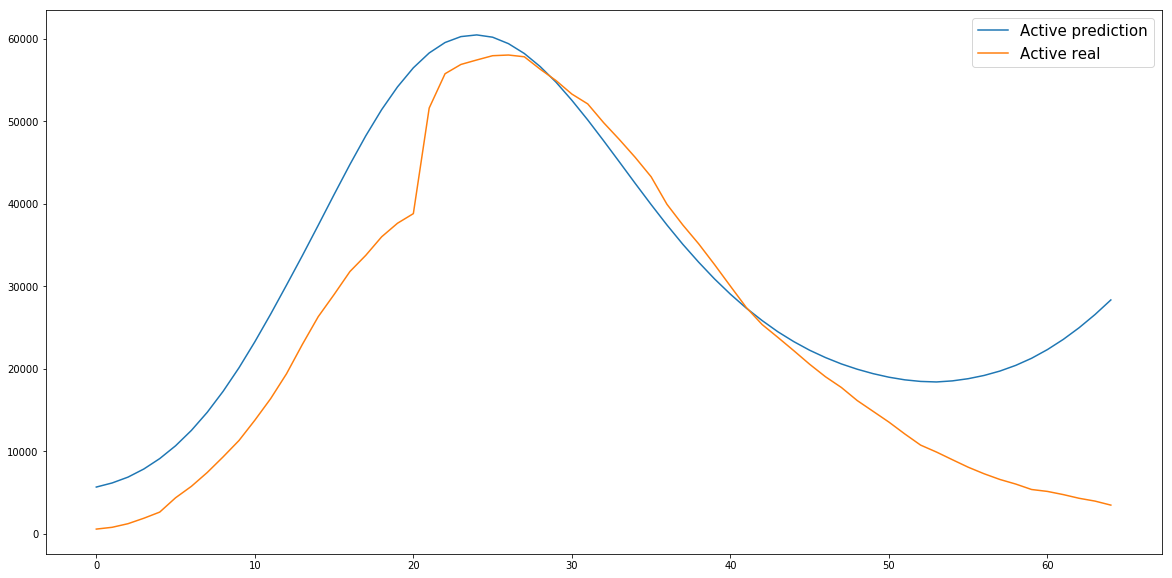

In [138]:
plt.figure(figsize=(20,10))
plt.plot(forecast_predictions, label = 'Active prediction')
plt.plot(df_china['active'], label = 'Active real')
plt.legend(fontsize=15)

In [141]:
scaled_full_data_mkd = full_scaler.fit_transform(np.array(df_mkd['active']).reshape(-1,1))

In [142]:
scaled_full_data_mkd.shape

(31, 1)

In [148]:
test_predictions = []
periods = 65
first_eval_batch = scaled_full_data_mkd[:length]
#first_eval_batch = scaled_full_data_mkd[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(periods):
    current_predict = model.predict(current_batch)[0]
    test_predictions.append(current_predict)
    current_batch = np.append(current_batch[:,1:,:],[[current_predict]] ,axis = 1)

In [149]:
forecast_predictions_mkd = full_scaler.inverse_transform(test_predictions)

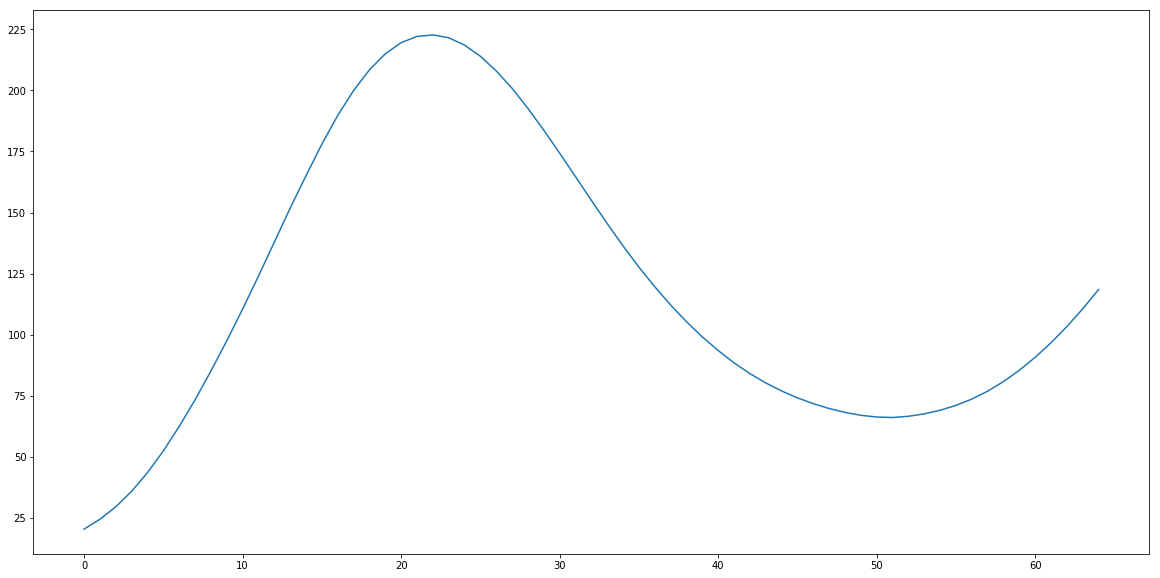

In [150]:
plt.figure(figsize=(20,10))
plt.plot(forecast_predictions_mkd, label = 'Active prediction')